Context

This dataset comes from research by Semeion, Research Center of Sciences of Communication. The original aim of the research was to correctly classify the type of surface defects in stainless steel plates, with six types of possible defects (plus "other"). The Input vector was made up of 27 indicators that approximately [describe] the geometric shape of the defect and its outline. According to the research paper, Semeion was commissioned by the Centro Sviluppo Materiali (Italy) for this task and therefore it is not possible to provide details on the nature of the 27 indicators used as Input vectors or the types of the 6 classes of defects.

Dataset can be accessed from here: https://www.kaggle.com/datasets/uciml/faulty-steel-plates

In [1]:
import modin.pandas as pd
# from modin.config import ProgressBar
# ProgressBar.enable()
import ray

ray.init()  # Start the Ray runtime for single-node
import os

os.environ["__MODIN_AUTOIMPORT_PANDAS__"] = "1"

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

2024-11-05 09:18:25,101	INFO worker.py:1816 -- Started a local Ray instance.


In [2]:
df = pd.read_csv(r"faults.csv")

Data types of partitions are different! Please refer to the troubleshooting section of the Modin documentation to fix this issue.


### INITIAL ACTIONS

In [3]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


In [5]:
# check duplicate values
df[["X_Maximum", "X_Minimum"]].value_counts()

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


X_Maximum  X_Minimum
212        39           11
218        41           10
214        39           10
212        41            9
216        41            9
                        ..
312        298           1
311        303           1
310        296           1
309        301           1
1713       1705          1
Name: count, Length: 1693, dtype: int64

In [6]:
df.query("X_Maximum == 212 and X_Minimum == 39")

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
415,39,212,862475,862693,17357,794,495,2034432,27,142,...,0.2064,-0.0843,1.0,0,0,1,0,0,0,0
434,39,212,1185602,1185752,13387,763,425,1546189,29,141,...,-0.1329,-0.0977,1.0,0,0,1,0,0,0,0
445,39,212,1299230,1299402,11875,657,387,1375431,32,143,...,-0.0058,-0.0951,1.0,0,0,1,0,0,0,0
620,39,212,1715280,1715348,6596,316,170,685447,44,124,...,-0.6069,-0.1881,1.0,0,0,1,0,0,0,0
628,39,212,1814642,1814708,6525,278,134,674367,38,124,...,-0.6185,-0.1926,1.0,0,0,1,0,0,0,0
648,39,212,2070134,2070204,6399,287,132,666455,41,126,...,-0.5954,-0.1863,1.0,0,0,1,0,0,0,0
659,39,212,2233368,2233436,6310,290,151,658162,41,125,...,-0.6069,-0.1851,1.0,0,0,1,0,0,0,0
660,39,212,2244009,2244082,6827,276,141,711671,40,124,...,-0.5780,-0.1856,1.0,0,0,1,0,0,0,0
681,39,212,2730163,2730230,6108,299,149,635284,40,125,...,-0.6127,-0.1874,1.0,0,0,1,0,0,0,0
685,39,212,2776296,2776362,6172,263,143,648030,39,126,...,-0.6185,-0.1797,1.0,0,0,1,0,0,0,0


In [5]:
df.drop_duplicates()
df.shape
# no row-wise duplicates

(1941, 34)

In [6]:
df.nunique()

X_Minimum                 962
X_Maximum                 994
Y_Minimum                1939
Y_Maximum                1940
Pixels_Areas              920
X_Perimeter               399
Y_Perimeter               317
Sum_of_Luminosity        1909
Minimum_of_Luminosity     161
Maximum_of_Luminosity     100
Length_of_Conveyer         84
TypeOfSteel_A300            2
TypeOfSteel_A400            2
Steel_Plate_Thickness      24
Edges_Index              1387
Empty_Index              1338
Square_Index              770
Outside_X_Index           454
Edges_X_Index             818
Edges_Y_Index             648
Outside_Global_Index        3
LogOfAreas                914
Log_X_Index               183
Log_Y_Index               217
Orientation_Index         918
Luminosity_Index         1522
SigmoidOfAreas            388
Pastry                      2
Z_Scratch                   2
K_Scatch                    2
Stains                      2
Dirtiness                   2
Bumps                       2
Other_Faul

In [9]:
df["Outside_Global_Index"].value_counts()

Outside_Global_Index
1.0    1072
0.0     778
0.5      91
Name: count, dtype: int64

In [10]:
df["TypeOfSteel_A300"].value_counts()

TypeOfSteel_A300
0    1164
1     777
Name: count, dtype: int64

### EDA

In [11]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [3]:
label_list = df.columns.values[-7:]
number_of_features = df.shape[1] - len(label_list)
features_list = []
for i, column in enumerate(df.columns.values):
    if column not in label_list:
        features_list.append(column)

In [4]:
label_list

array(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'], dtype=object)

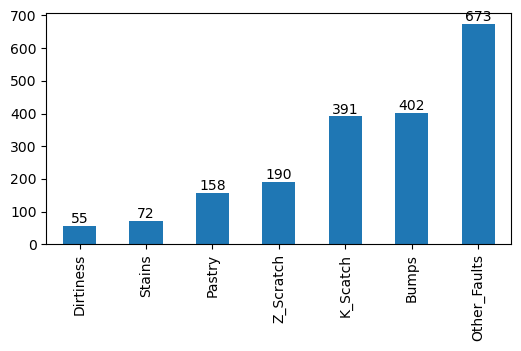

In [14]:
# class distribution
plt.figure(figsize=(6, 3))
a = df[label_list].sum().sort_values().plot.bar()
plt.bar_label(a.containers[0])
plt.show()

In [14]:
# check if there's a missing value in the dataset
df.isnull().any().any()

False

In [15]:
df.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch                   int64
Stains    

In [5]:
features_list

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [4]:
categorical_features = []
for feature in features_list:
    for char in feature:
        if char.isdigit():
            if feature not in categorical_features:
                categorical_features.append(feature)
categorical_features

['TypeOfSteel_A300', 'TypeOfSteel_A400']

In [5]:
numerical_features = []
for feature in features_list:
    if feature not in categorical_features:
        numerical_features.append(feature)
numerical_features

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

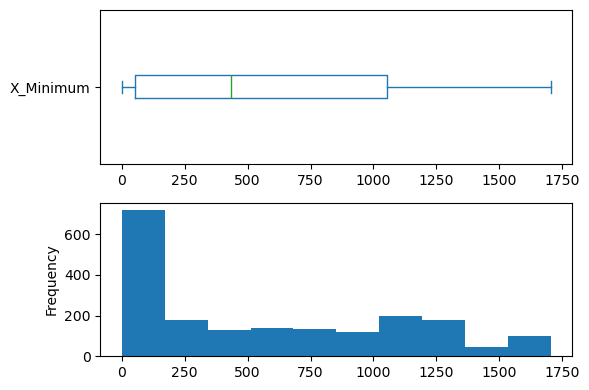

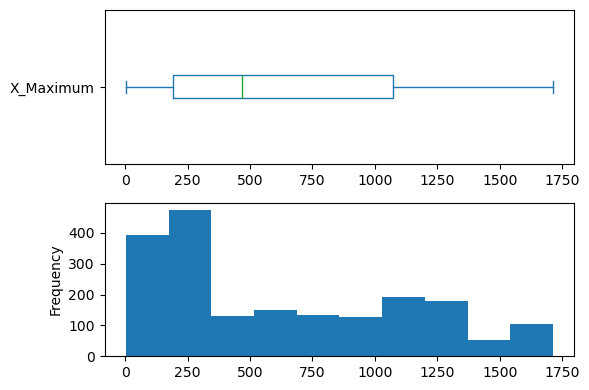

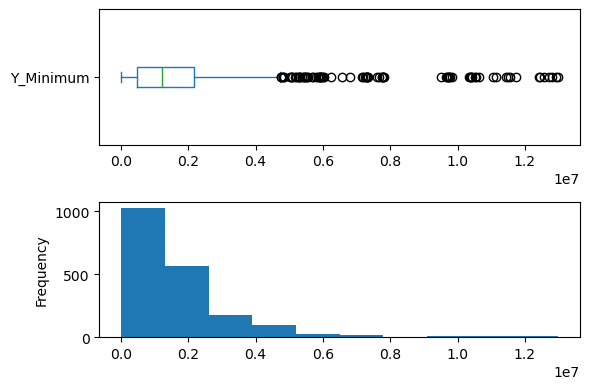

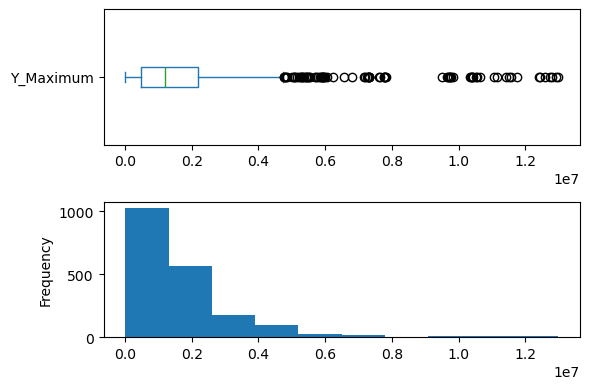

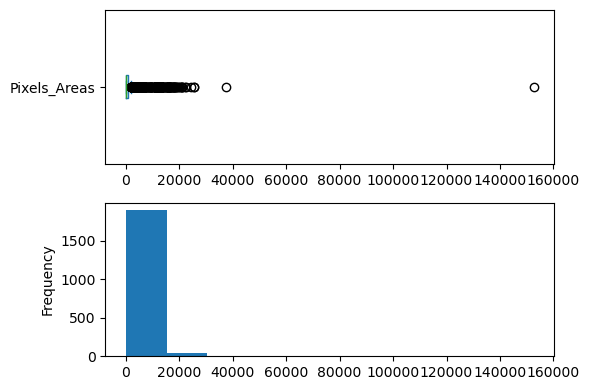

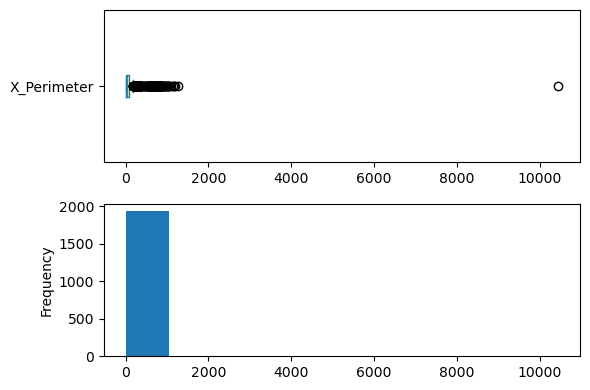

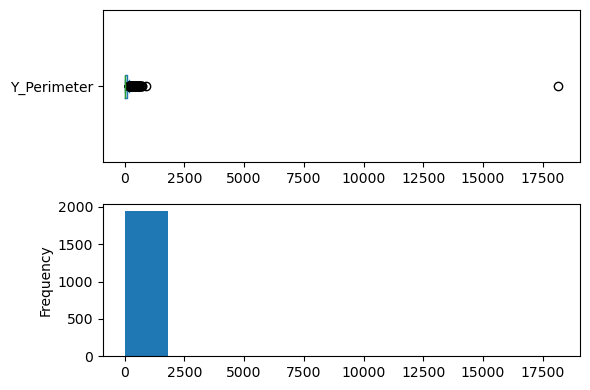

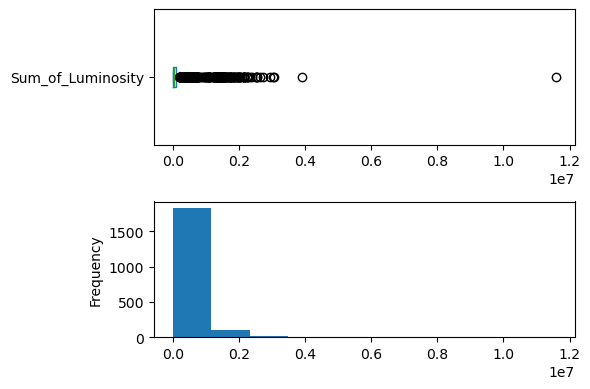

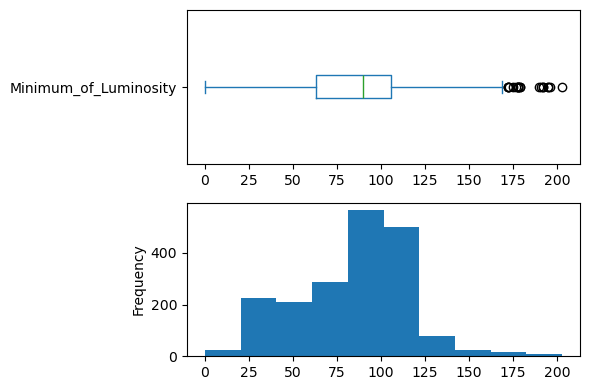

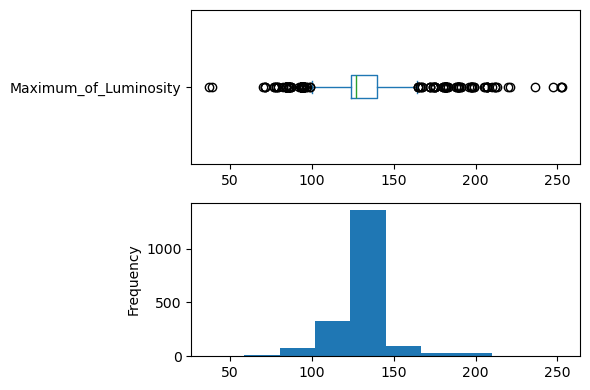

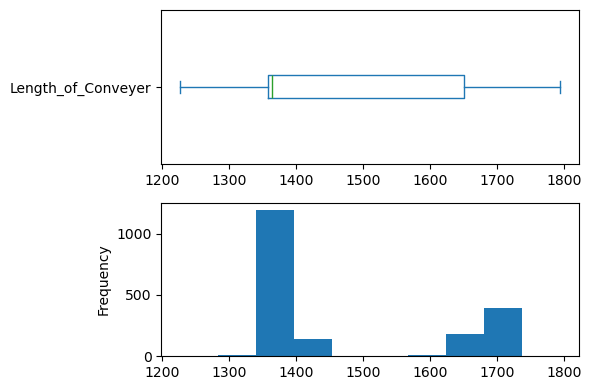

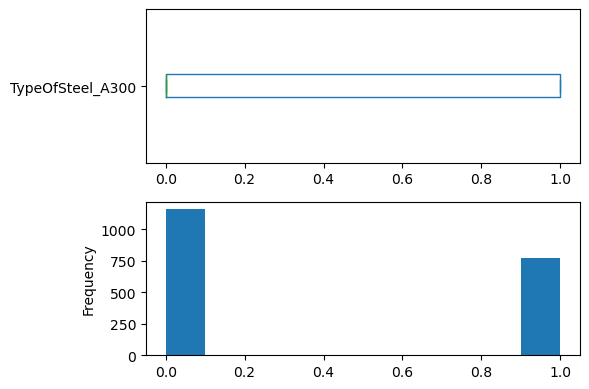

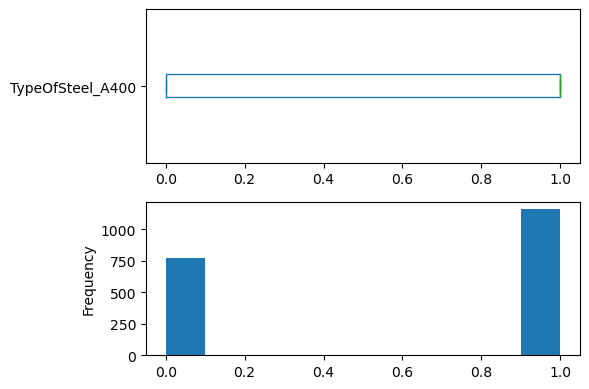

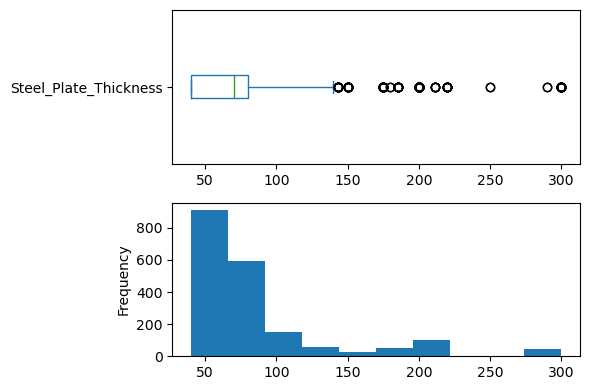

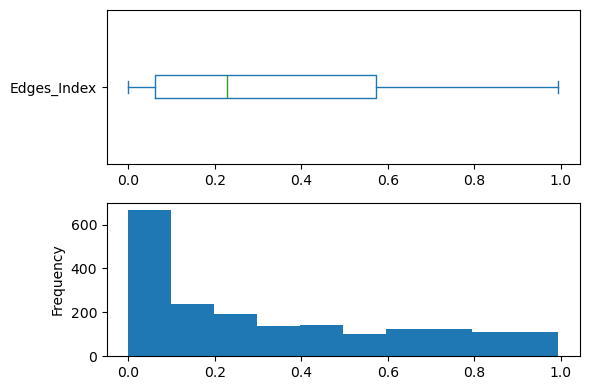

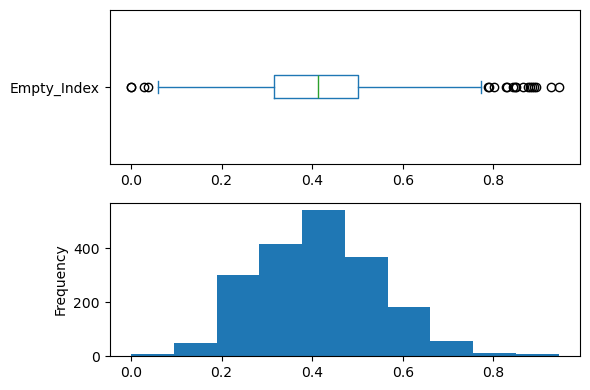

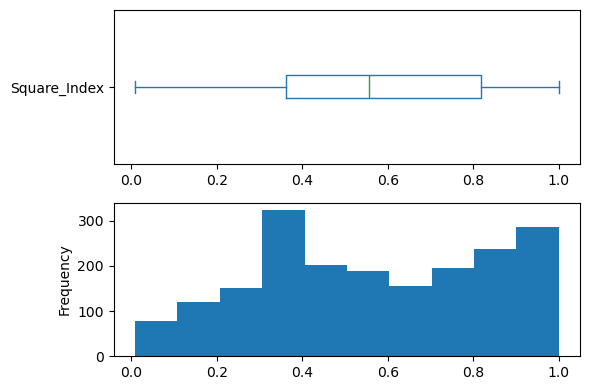

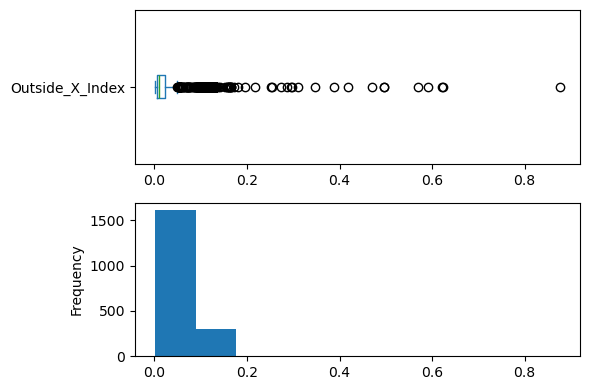

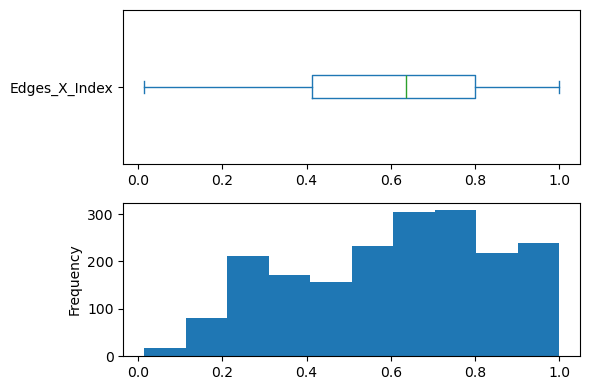

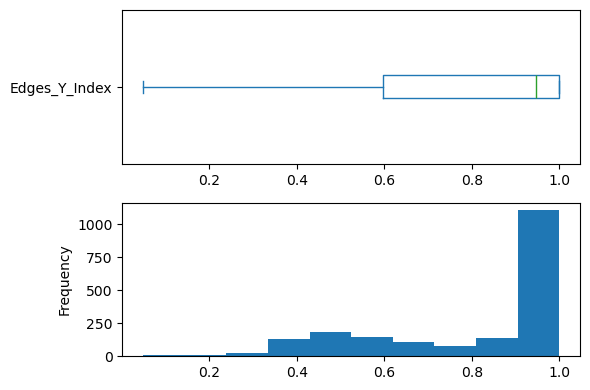

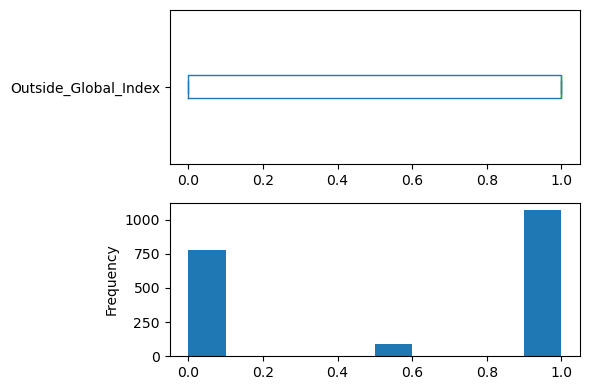

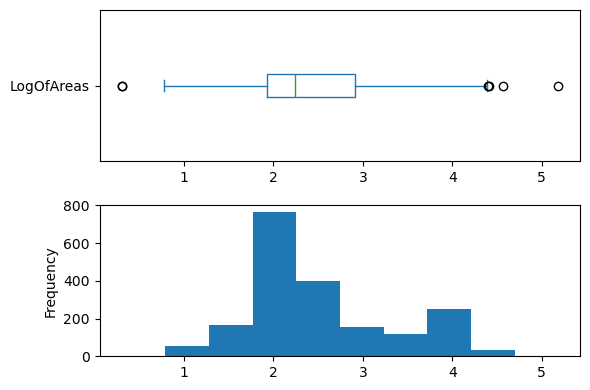

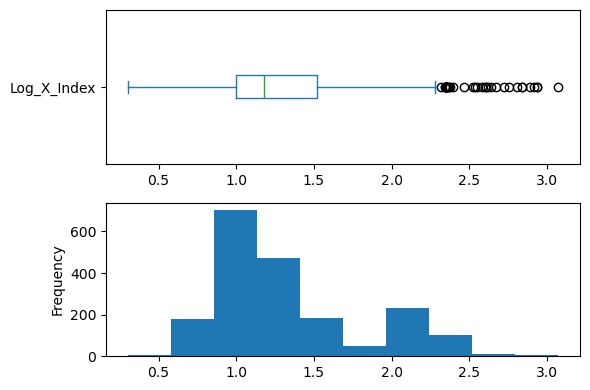

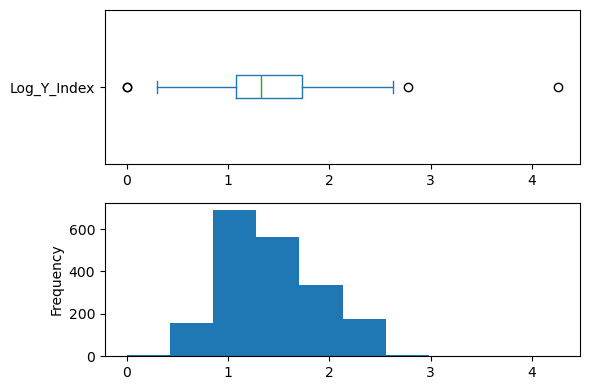

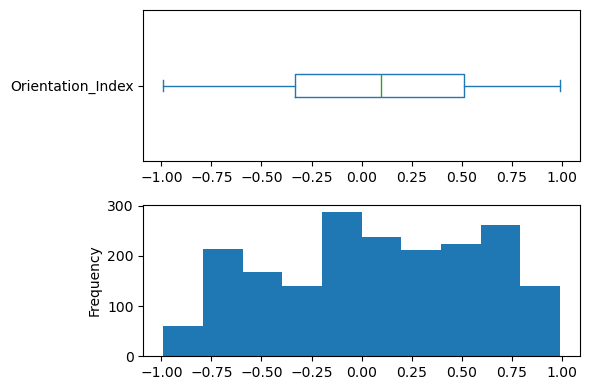

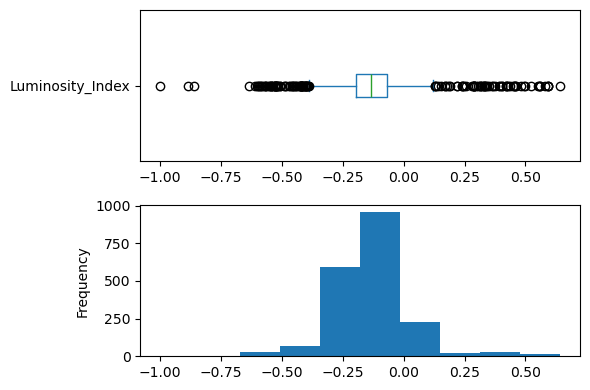

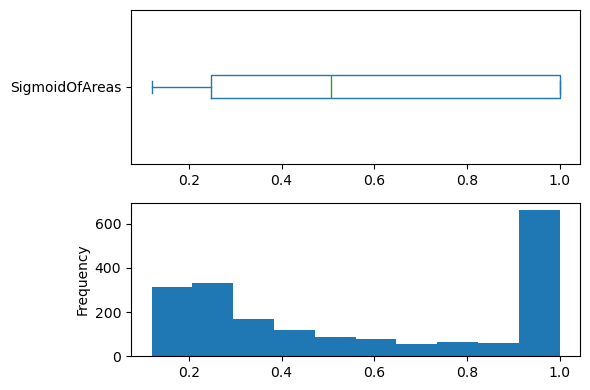

In [23]:
for feature in features_list:
    plt.figure(figsize=(6, 4))
    plt.subplot(2, 1, 1)
    df[feature].plot.box(vert=False)
    plt.subplot(2, 1, 2)
    df[feature].plot.hist()
    plt.tight_layout()
    plt.show()

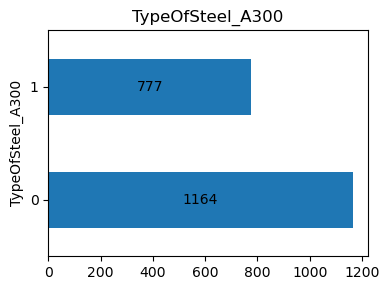

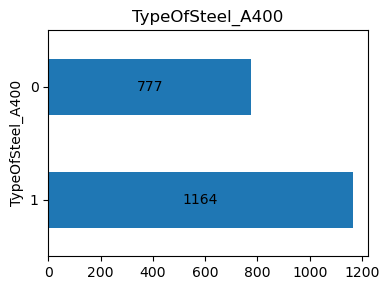

In [24]:
for feature in categorical_features:
    plt.figure(figsize=(4, 3))
    ax = df[feature].value_counts().plot.barh(stacked=True)
    plt.title(feature)
    plt.tight_layout()
    plt.bar_label(ax.containers[0], label_type="center")
    plt.show()

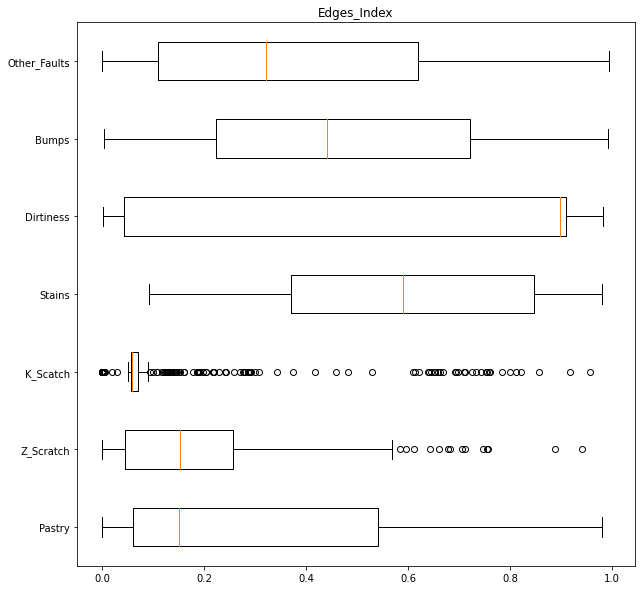

In [14]:
box_plot = pd.Series('', index = label_list)

for i in label_list:
    BM = df[i] == 1
    box_plot[i] = df[BM]['Edges_Index']

plt.figure(figsize=(10, 10))
plt.boxplot(box_plot,vert=False)
plt.title('Edges_Index')
plt.yticks(np.arange(1,8),label_list)
plt.show()abc

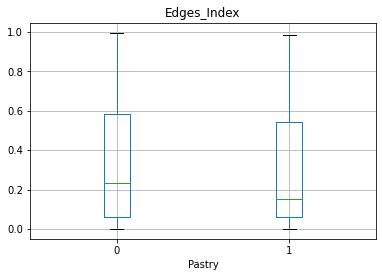

In [24]:
df.boxplot(column="Edges_Index", by="Pastry")
plt.suptitle("")
plt.show()

In [6]:
label_str = []
for i in label_list.tolist():
    label_str.append(str(i))
label_str.reverse()
label_str

['Other_Faults',
 'Bumps',
 'Dirtiness',
 'Stains',
 'K_Scatch',
 'Z_Scratch',
 'Pastry']

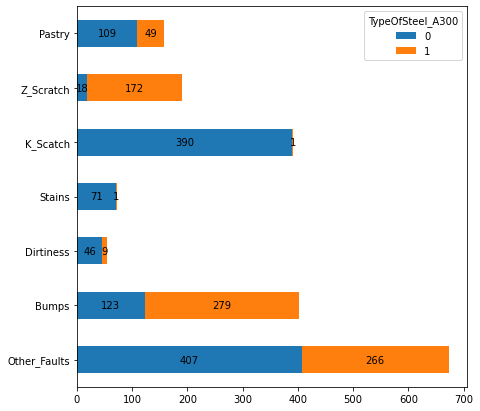

In [11]:
b = (
    df.groupby(label_list.tolist() + ["TypeOfSteel_A300"])
    .size()
    .unstack()
    .plot.barh(stacked=True, figsize=(7, 7))
)
plt.bar_label(b.containers[0], label_type="center")
plt.bar_label(b.containers[1], label_type="center")
plt.ylabel(None)
y_labels = label_list.tolist()[::-1]
plt.yticks(np.arange(0, 7), y_labels)
plt.show()

In [163]:
# can be used to read the numbers more clearly in the above figure
contingency_tbl = pd.crosstab(df[label_list.tolist()[0]], df["TypeOfSteel_A300"])
contingency_tbl

TypeOfSteel_A300,0,1
Pastry,,
0,1055,728
1,109,49


In [ ]:
matplotlib.interactive(False)
sns_plot = sns.pairplot(df[numerical_features], diag_kind="kde")
sns_plot.savefig("pairplot.png")

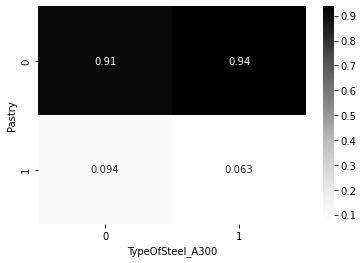

In [164]:
probablity_tbl = contingency_tbl / contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5, cmap="Greys")
plt.show()

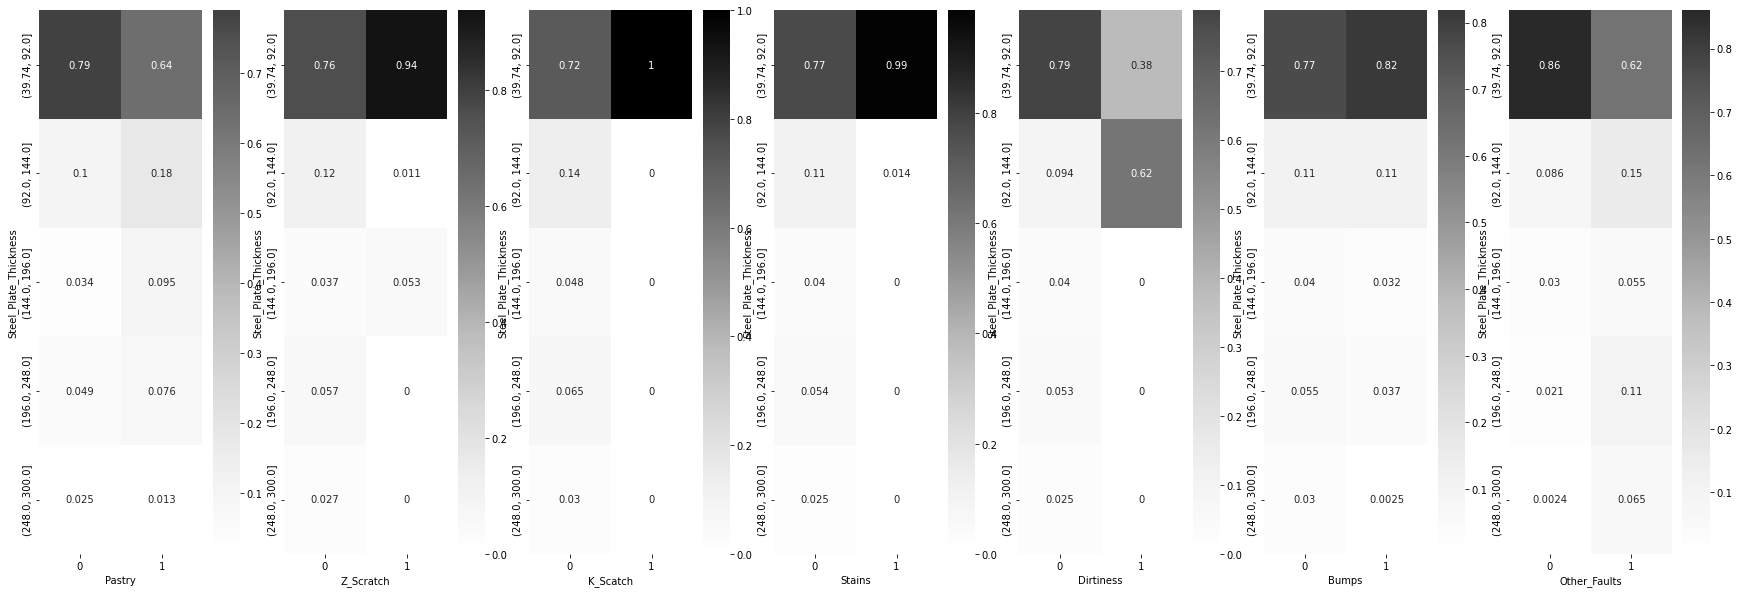

In [46]:
plt.subplots(1, 7, figsize=(30, 10), constrained_layout=False)
for i, label in enumerate(label_list.tolist()):
    plt.subplot(1, 7, i + 1)
    discretized = pd.cut(df["Steel_Plate_Thickness"], bins=5)
    contingency_tbl = pd.crosstab(discretized, df[label])
    probablity_tbl = contingency_tbl / contingency_tbl.sum()
    sns.heatmap(probablity_tbl, annot=True, center=0.5, cmap="Greys")
plt.show()
# majority of the faults occur in thicknesses between 39.74-92.0

In [18]:
discretized = pd.cut(df["Steel_Plate_Thickness"], bins=5)

In [77]:
pd.crosstab(discretized, df["Pastry"])
# can be used to obtain numeric values for the heatmap above if desired

Pastry,0,1
Steel_Plate_Thickness,,
"(39.74, 92.0]",1407,101
"(92.0, 144.0]",183,28
"(144.0, 196.0]",60,15
"(196.0, 248.0]",88,12
"(248.0, 300.0]",45,2


In [64]:
# Is it because majority of the data is in between these thickness values? Yes, as shown below.

BM = (df["Steel_Plate_Thickness"] > 39.74) & (df["Steel_Plate_Thickness"] < 92.0)
(
    1 - (df.shape[0] - df[BM].shape[0]) / df.shape[0]
)  # 78% data belongs to thicknesses between 39.74-92.0

0.7769191138588356

In [91]:
# Above can also be verified as shown below. 1508 data objects (rows) out of 1941 belong to thicknesses between 39.74 and 92
discretized.describe()

count              1941
unique                5
top       (39.74, 92.0]
freq               1508
Name: Steel_Plate_Thickness, dtype: object

In [93]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df["Pastry"], discretized)
chi2, p, dof, expected = chi2_contingency(table.values)
print("Chi-square %0.2f p-value %0.3f" % (chi2, p))

Chi-square 28.67 p-value 0.000


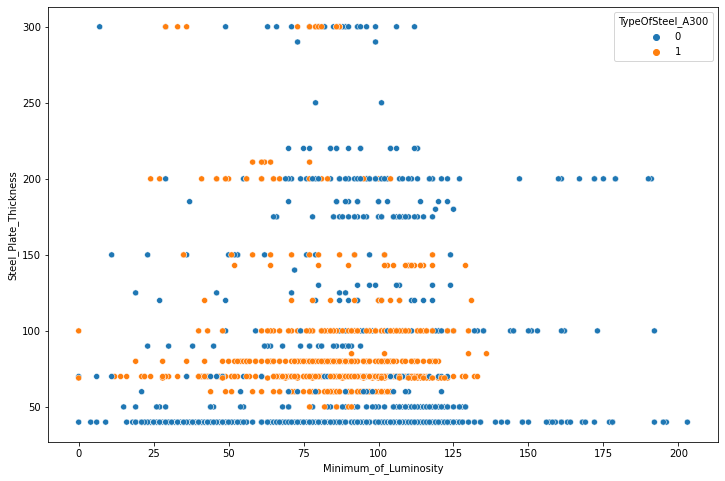

In [72]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.scatterplot(
    data=df,
    y="Steel_Plate_Thickness",
    x="Minimum_of_Luminosity",
    hue="TypeOfSteel_A300",
)
plt.show()

### OUTLIER DETECTION

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


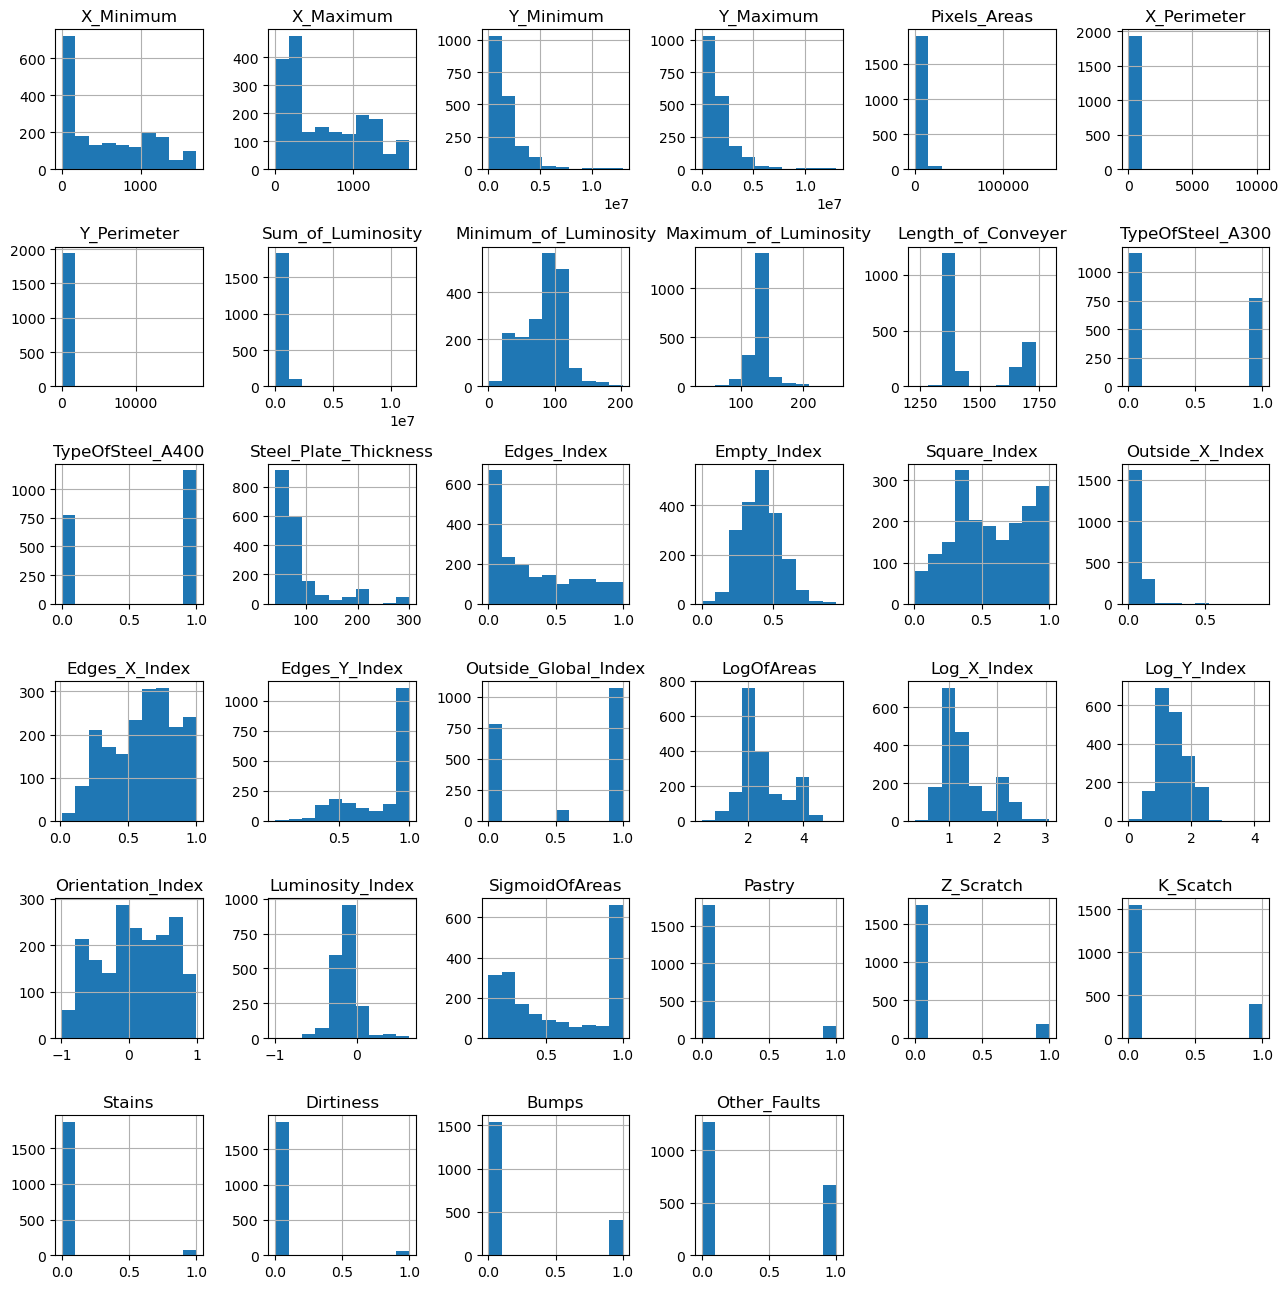

In [12]:
df.hist(column=df.columns.tolist(), figsize=(13, 13))
plt.tight_layout()

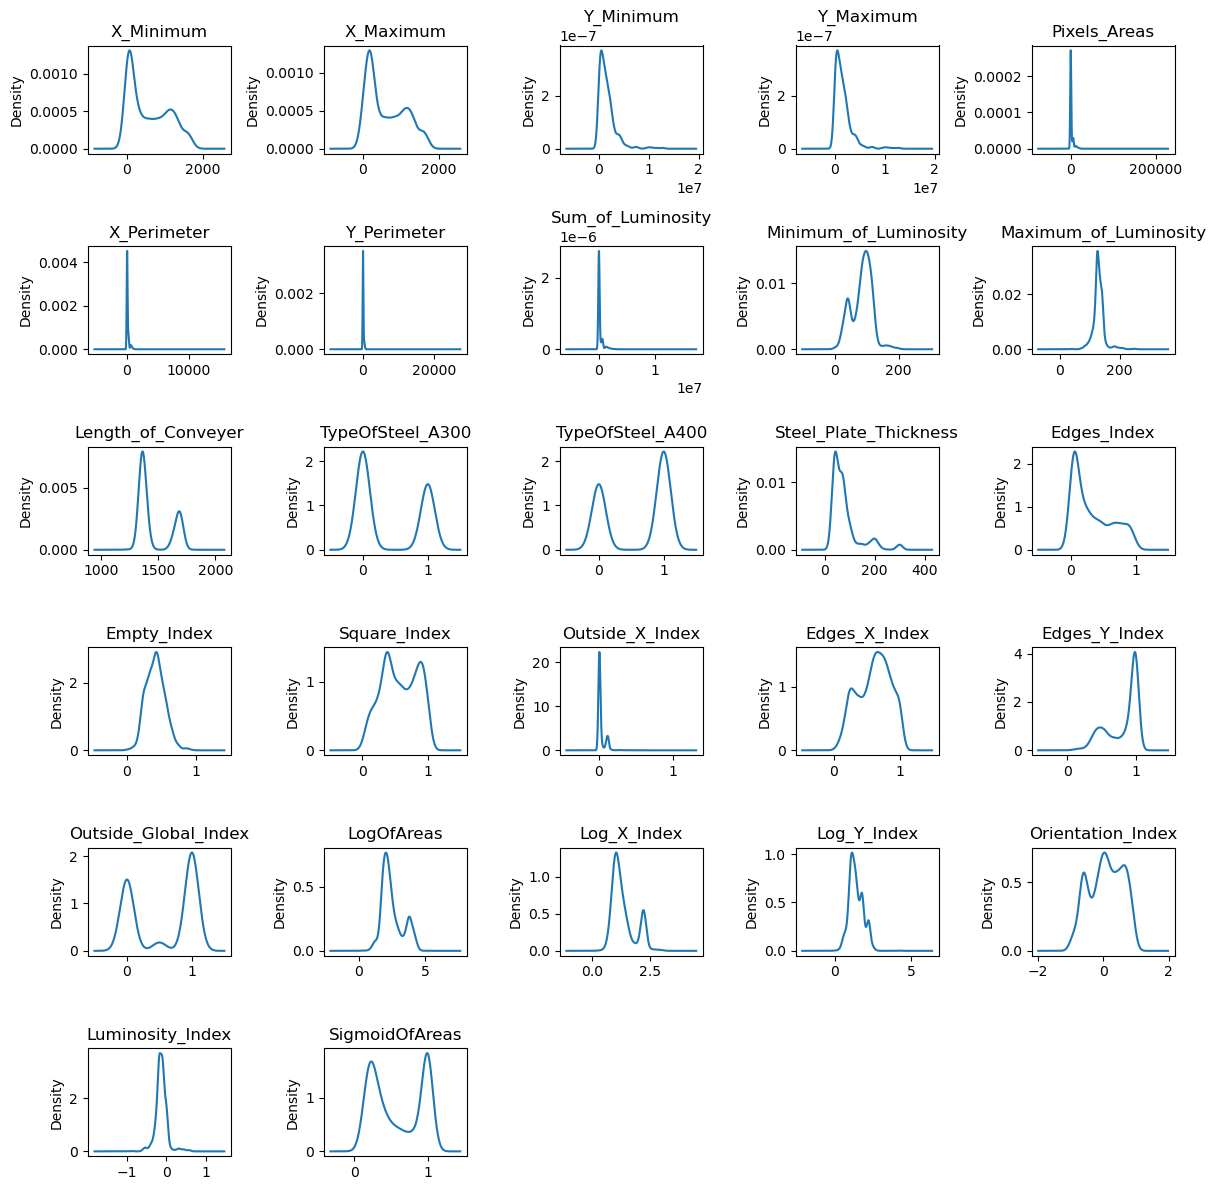

In [13]:
for i, feature in enumerate(features_list):
    plt.subplot(6, 5, i + 1)
    df[feature].plot.kde(figsize=(12, 12))
    plt.title(feature)
plt.tight_layout()
plt.show()

In [7]:
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
wna = scaler.fit_transform(df)
wdf = pd.DataFrame(wna, columns = df.columns)

not_for_kde = ['Outside_Global_Index', 'Luminosity_Index', 'Empty_Index', 'Outside_X_Index', 'Log_Y_Index', 'Maximum_of_Luminosity', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Pixels_Areas', 'Y_Maximum', 'Y_Minimum']
feats_kde = [i for i in numerical_features if i not in not_for_kde] # eliminating these feature because of either very low cardinality or unimodal distribution
data_array = wdf[feats_kde].values

In [9]:
kde = gaussian_kde(data_array.T)
density_scores = kde.evaluate(data_array.T)
mask = density_scores >= np.percentile(density_scores, 3)
df_no_outliers = df[mask].copy()

In [10]:
df_no_outliers.shape

(1882, 34)

#### MULTIVARIATE OUTLIER ELIMINATION

In [11]:
# use isolation forest on not_for_kde list of features

from sklearn.ensemble import IsolationForest

auto_detection = IsolationForest(
    max_samples=50, contamination=0.025, random_state=0, n_jobs=-1
)
# assumed 2.5% of the cases are to be considered outliers because of data quality.

auto_detection.fit(df_no_outliers[not_for_kde]) 
evaluation = auto_detection.predict(df_no_outliers[not_for_kde])
suspected_outliers = df_no_outliers[evaluation == -1]

In [12]:
df_no_outliers.drop(index=suspected_outliers.index.tolist(), inplace=True)
df_no_outliers.shape

(1834, 34)

In [13]:
df_no_outliers.reset_index(inplace=True, drop = True)

In [14]:
df_no_outliers

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,430,441,100250,100337,630,20,87,62357,64,127,...,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1830,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1831,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1832,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


### FEATURE SELECTION and TRANSFORMATION

In [19]:
# checking for differences greater than 0.2 between spearman and pearson correlation matrices
((df_no_outliers.corr(method="spearman") - df_no_outliers.corr()) > 0.2).sum().sum()

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


26

In [23]:
corr_table = df_no_outliers[numerical_features].corr()
BM = (corr_table > 0.7) | (corr_table < -0.7)
corr_table[BM]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.995123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_Maximum,0.995123,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y_Minimum,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y_Maximum,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pixels_Areas,NaN,NaN,NaN,NaN,1.000000,0.958736,0.910390,0.996864,NaN,NaN,...,0.860065,NaN,NaN,NaN,0.830107,0.803088,NaN,NaN,NaN,NaN
X_Perimeter,NaN,NaN,NaN,NaN,0.958736,1.000000,0.954633,0.963894,NaN,NaN,...,0.817915,NaN,NaN,NaN,0.815042,0.791125,NaN,NaN,NaN,NaN
Y_Perimeter,NaN,NaN,NaN,NaN,0.910390,0.954633,1.000000,0.916409,NaN,NaN,...,NaN,NaN,NaN,NaN,0.817125,NaN,0.777195,NaN,NaN,NaN
Sum_of_Luminosity,NaN,NaN,NaN,NaN,0.996864,0.963894,0.916409,1.000000,NaN,NaN,...,0.838262,NaN,NaN,NaN,0.810986,0.783227,NaN,NaN,NaN,NaN
Minimum_of_Luminosity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.703402,NaN
Maximum_of_Luminosity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.885603,NaN


In [24]:
# number of feature pairs with absolute correlations greater than 0.7 out of 300 unique feature pairs
a = (corr_table[BM].count().sum() - corr_table.shape[1]) / 2
a

32.0

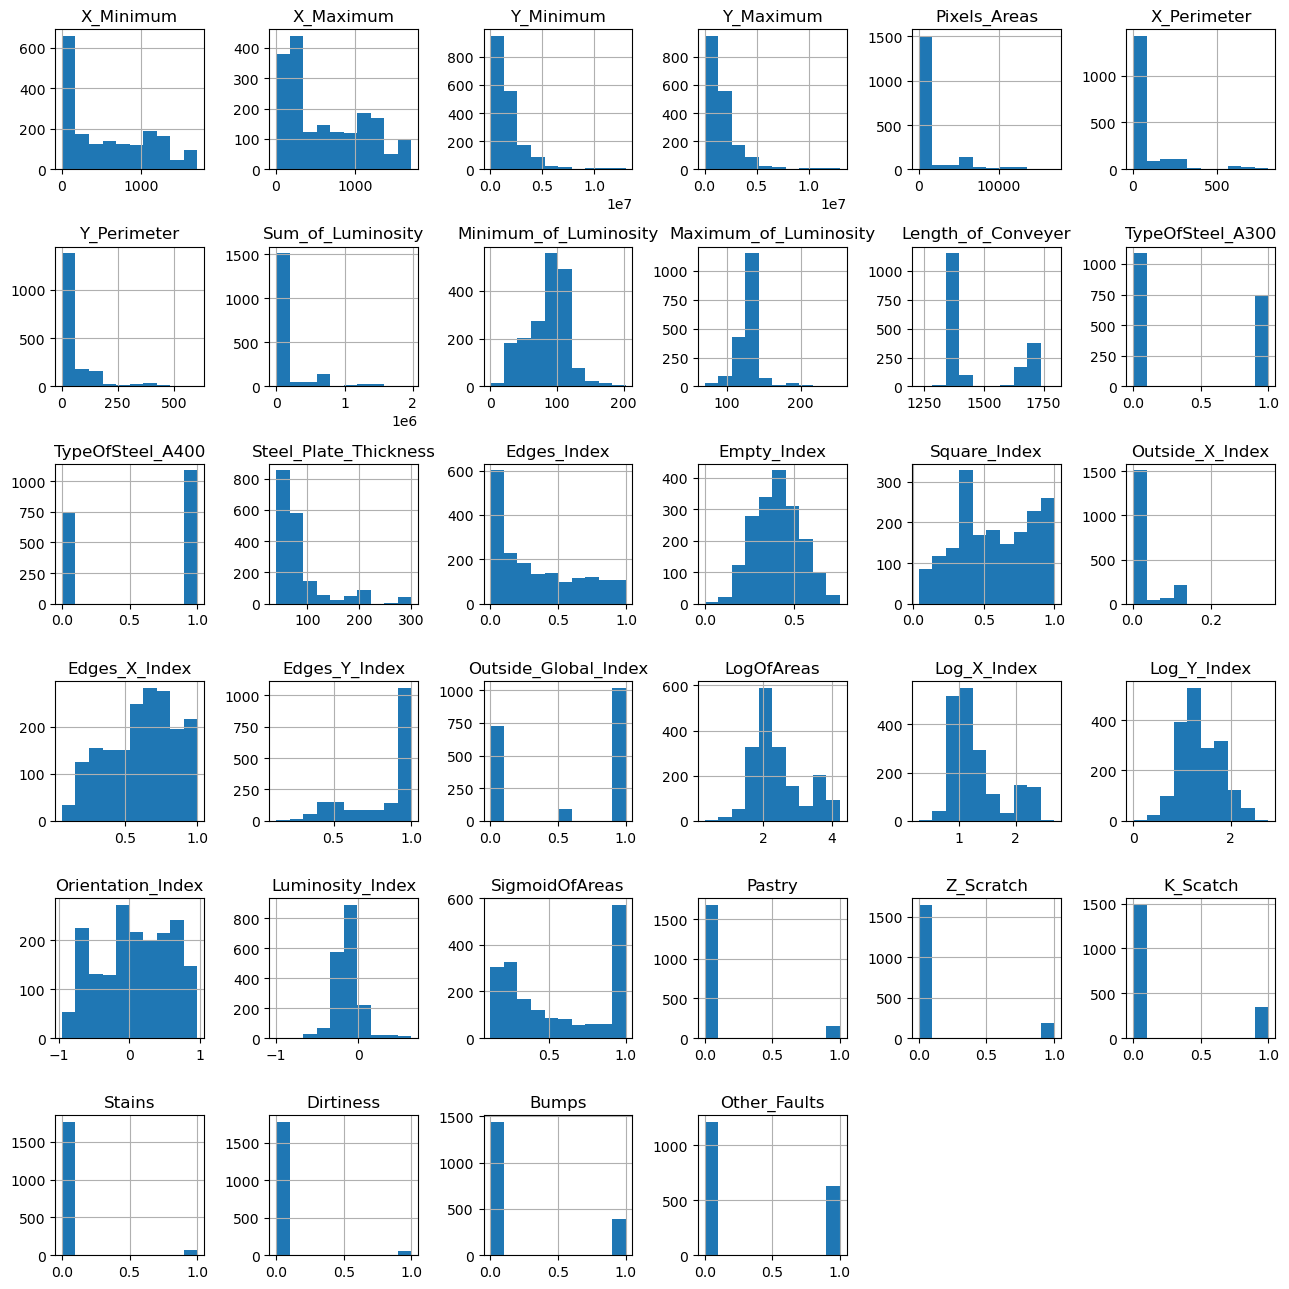

In [32]:
# distributions before transformations
df_no_outliers.hist(column=df.columns.tolist(), figsize=(13, 13))
plt.tight_layout()
# plt.show()
#plt.savefig("raw data")

In [15]:
# preparation for a t-SNE to check class separability difficulty
wdf_1 = df_no_outliers.copy()
wdf_1["Pastry"].replace({1: "Pastry", 0: ""}, inplace=True)
wdf_1["Z_Scratch"].replace({1: "Z_Scratch", 0: ""}, inplace=True)
wdf_1["K_Scatch"].replace({1: "K_Scatch", 0: ""}, inplace=True)
wdf_1["Stains"].replace({1: "Stains", 0: ""}, inplace=True)
wdf_1["Dirtiness"].replace({1: "Dirtiness", 0: ""}, inplace=True)
wdf_1["Bumps"].replace({1: "Bumps", 0: ""}, inplace=True)
wdf_1["Other_Faults"].replace({1: "Other_Faults", 0: ""}, inplace=True)
wdf_1["targets"] = (
    wdf_1["Pastry"]
    + wdf_1["Z_Scratch"]
    + wdf_1["K_Scatch"]
    + wdf_1["Stains"]
    + wdf_1["Dirtiness"]
    + wdf_1["Bumps"]
    + wdf_1["Other_Faults"]
)

wdf_1.drop(columns=label_list, inplace=True)
wdf_1[features_list] = (wdf_1[features_list] - wdf_1[features_list].min()) / (
    wdf_1[features_list].max() - wdf_1[features_list].min()
)

In [16]:
wdf_1.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,targets
0,0.024633,0.026916,0.020352,0.020354,0.015619,0.018773,0.071310,0.012129,0.374384,0.207650,...,0.434099,1.000000,1.0,0.541032,0.253933,0.592039,0.925777,0.431200,0.525766,Pastry
1,0.378299,0.378584,0.195006,0.195007,0.006248,0.010013,0.048093,0.005640,0.413793,0.289617,...,0.572421,0.961671,1.0,0.440971,0.201257,0.526801,0.912704,0.501706,0.203632,Pastry
2,0.486217,0.486249,0.119190,0.119190,0.004067,0.007509,0.029851,0.003907,0.487685,0.300546,...,0.732763,0.939457,1.0,0.394619,0.201257,0.452197,0.846867,0.533882,0.108967,Pastry
3,0.500293,0.500878,0.027938,0.027940,0.010256,0.013767,0.072968,0.009485,0.487685,0.306011,...,0.506681,1.000000,1.0,0.494960,0.229472,0.595533,0.939424,0.513163,0.456527,Pastry
4,0.252199,0.255705,0.007206,0.007212,0.037015,0.022528,0.142620,0.031426,0.315271,0.311475,...,0.518974,1.000000,1.0,0.635926,0.312260,0.698667,0.954633,0.470567,0.985698,Pastry


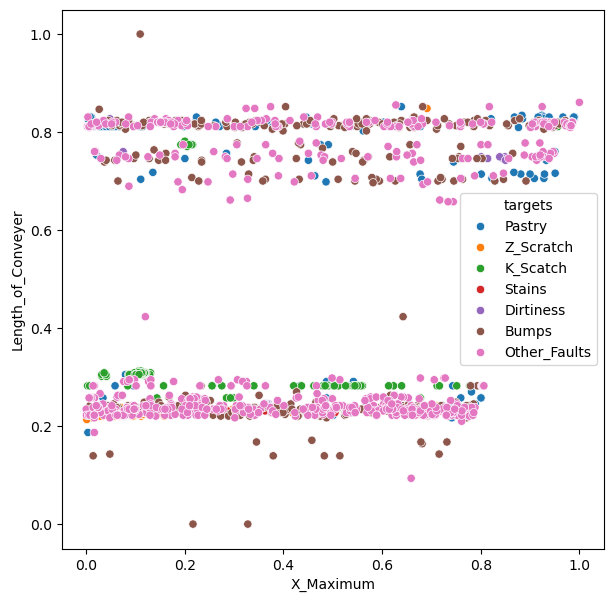

In [19]:
# Looking at plots such as below proves that the classes are linearly non separable. Therefore, use Kernel PCA later on instead of PCA.
fig = plt.gcf()
fig.set_size_inches(7, 7)

sns.scatterplot(data=wdf_1, y="Length_of_Conveyer", x="X_Maximum", hue="targets")
plt.show()

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    init="pca",
    random_state=0,
    perplexity=30,
    early_exaggeration=25,
    n_iter=300,
    n_jobs=-1,
)
Tx = tsne.fit_transform(wdf_1[features_list].values)

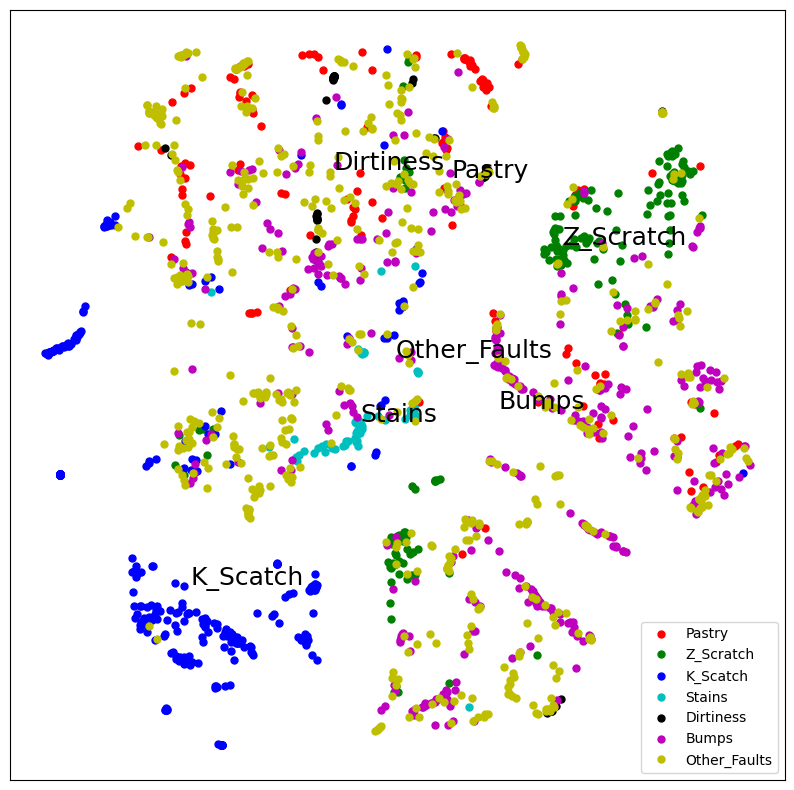

In [37]:
colors = ["r", "g", "b", "c", "k", "m", "y"]
plt.figure(figsize=(10, 10))
plt.xticks([], [])
plt.yticks([], [])

for color, target in zip(colors, label_list):
    selection = wdf_1["targets"].values == target
    X1, X2 = Tx[selection, 0], Tx[selection, 1]
    c1, c2 = np.median(X1), np.median(X2)
    plt.plot(X1, X2, "o", ms=5, color=color)
    plt.text(c1, c2, target, fontsize=18)
plt.legend(label_list, prop={"size": 10})

In [17]:
from sklearn.model_selection import (
    cross_val_score,
    train_test_split,
    RepeatedStratifiedKFold,
    RandomizedSearchCV,
)
from sklearn.base import clone
from sklearn.feature_selection import RFECV
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    PowerTransformer,
    StandardScaler,
    QuantileTransformer,
    MinMaxScaler,
)
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, KernelPCA

In [18]:
estimators = [RandomForestClassifier(random_state = 0)] # estimators for RFECV. Could also use gradient boosting classifier, decision tree, etc
estimator_names = ["RF"]


initial_models = [
    SVC(kernel="rbf", random_state = 1),
    ExtraTreeClassifier(random_state = 1),
    KNeighborsClassifier(n_jobs=-2),
    RandomForestClassifier(n_jobs=-2, random_state = 1),
    RandomForestClassifier(class_weight="balanced", n_jobs=-2, random_state = 1),
    RandomForestClassifier(class_weight="balanced_subsample", n_jobs=-2, random_state = 1),
    GradientBoostingClassifier(random_state = 1),
    XGBClassifier(use_label_encoder=False, n_jobs=-2, random_state = 1),
    DummyClassifier(strategy="most_frequent", random_state = 1),
    DummyClassifier(strategy="stratified", random_state = 1)
]
initial_models_names = ["SVM", "ETC", "KNN", "RF", "RFB", "RFBS", "GBC", "XGB", "DCMS", "DCST"]

set1 = df_no_outliers.columns
set2 = df_no_outliers[numerical_features].columns
features_to_transform = list(set1.intersection(set2))

loc_of_feat_to_trans = []  # location of features to transform
mask = np.isin(np.array(set1), np.array(features_to_transform))
for i, y in enumerate(mask):
    if y == True:
        loc_of_feat_to_trans.append(i)


X = df_no_outliers[features_list].values
y = df_no_outliers[label_list].values

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2, shuffle=True, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, random_state=42, test_size=0.2, shuffle=True, stratify=y_train_full
)

transformer = PowerTransformer(method="yeo-johnson", standardize=True)

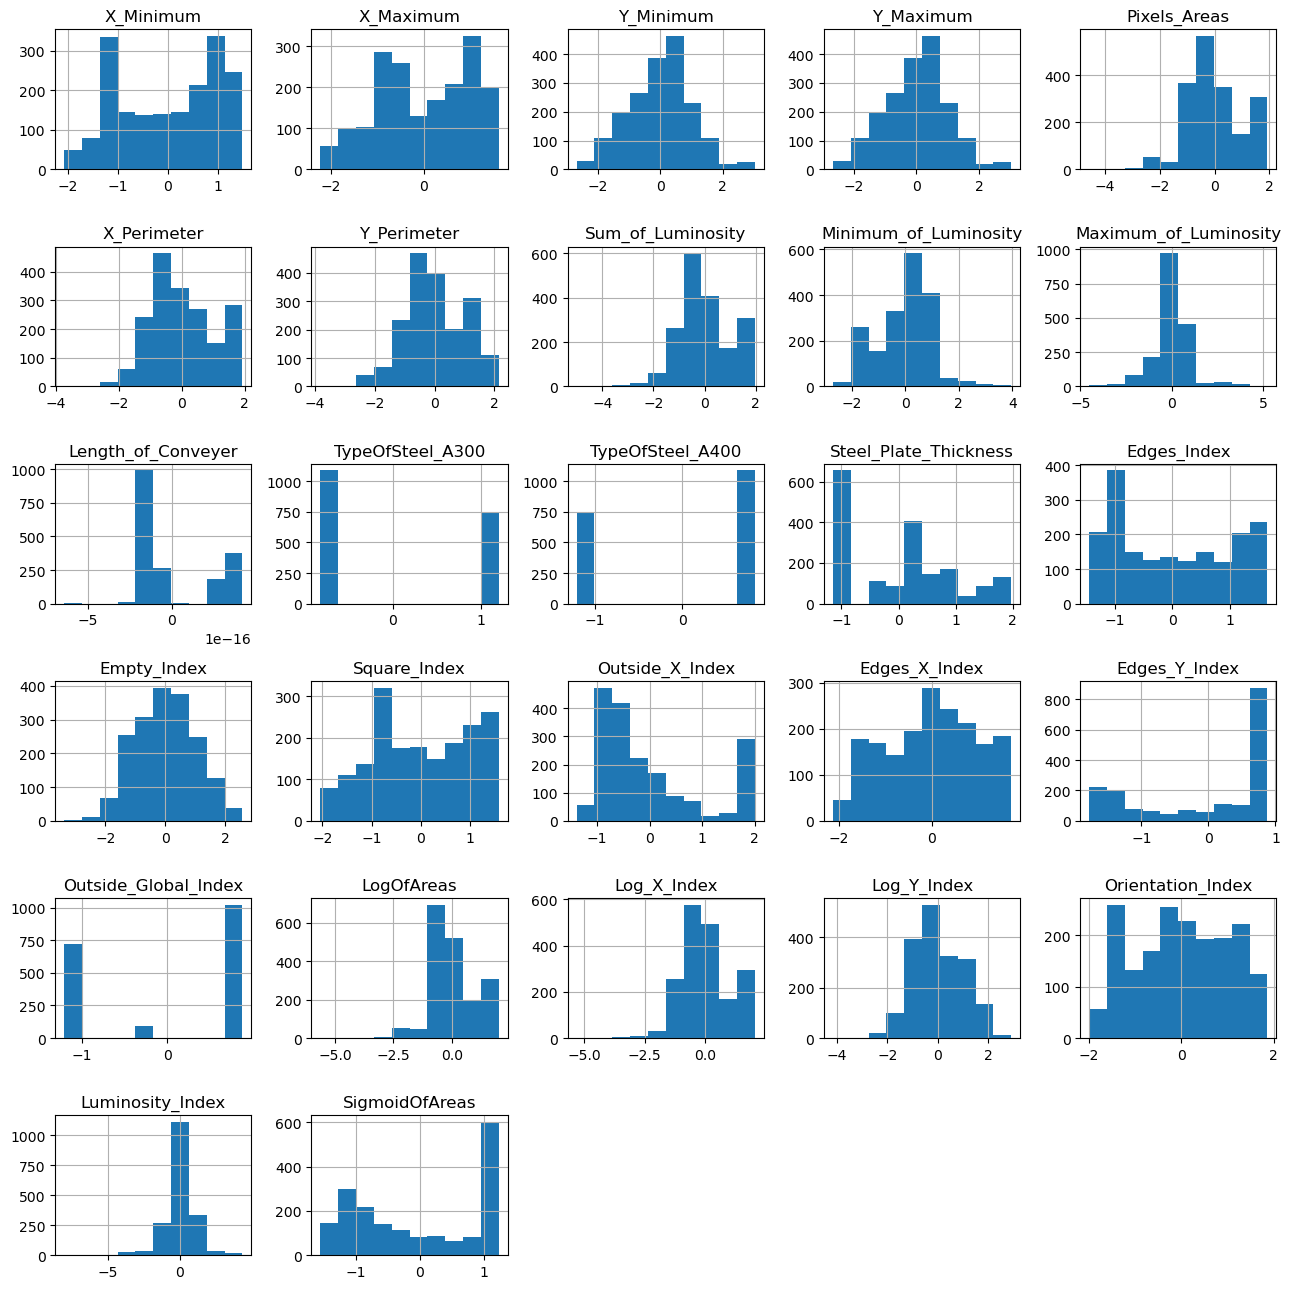

In [40]:
# check the distributions of the transformed data. since I'll use algorithms less-sensitive to non-normality, they look good enough.
transformed_data = transformer.fit_transform(X)
wdf_transformed = pd.DataFrame(
    transformed_data, columns=df[features_list].columns.tolist()
)

wdf_transformed.hist(column=wdf_transformed.columns.tolist(), figsize=(13, 13))
plt.tight_layout()
plt.show()
# plt.savefig('transformed data')

In [24]:
no_of_comp_to_try = 20  # number of Kernel PCA components to try

In [26]:
# can't use n_jobs = -1 everywhere due to terminated worker error
from sklearn.model_selection import StratifiedKFold

cv_rfecv = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

def get_models(): # models with RFECV applied
    models = dict()
    for model_name, model in zip(initial_models_names, initial_models):
        for estimator_name, estimator in zip(estimator_names, estimators):
            rfecv = RFECV(
                estimator=estimator, cv=cv_rfecv, scoring="balanced_accuracy", step=1, n_jobs=-2
            )
            models[model_name + " with estimator: " + estimator_name] = Pipeline(
                steps=[("t", transformer), ("rfecv", clone(rfecv)), ("model", model)]
            )
    return models


def get_models_kpca(): # models with kPCA applied
    models_kpca = dict()
    for model_name, model in zip(initial_models_names, initial_models):
        for no_of_components in range(1, no_of_comp_to_try, 3): # added a step size to shorten computation time
            models_kpca[
                model_name + " kPCA with " + str(no_of_components) + " components"
            ] = Pipeline(
                steps=[
                    ("norm", MinMaxScaler()),
                    (
                        "kpca",
                        KernelPCA(
                            n_components=no_of_components, kernel="rbf", n_jobs=-1
                        ),
                    ),
                    ("model_kpca", model),
                ]
            )
    return models_kpca


def evaluate_model(model, X, y):
    # adjust y_train so repeated stratified kfold can use it
    adjusted_y = np.argmax(
        y, axis=1
    )
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=2)
    scores = cross_val_score(
        model, X, adjusted_y, scoring="balanced_accuracy", cv=cv, n_jobs=None
    )
    return scores

In [27]:
models = dict(get_models(), **get_models_kpca())
result_df = pd.DataFrame(columns=["Model name", "Mean scores", "Std of scores"])

In [28]:
len(models.keys())

80

In [ ]:
index = 0
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    dic_append = {
        "Model name": name,
        "Mean scores": np.mean(scores),
        "Std of scores": np.std(scores),
    }
    result_df.loc[index] = dic_append
    index += 1

In [30]:
result_df.head()

,Model name,Mean scores,Std of scores
0,SVM with estimator: RF,0.636636,0.038246
1,ETC with estimator: RF,0.593247,0.020647
2,KNN with estimator: RF,0.713975,0.028316
3,RF with estimator: RF,0.714707,0.025002
4,RFB with estimator: RF,0.709998,0.026920


In [31]:
result_df.sort_values(by="Mean scores", ascending=False).head(15)

,Model name,Mean scores,Std of scores
7,XGB with estimator: RF,0.756403,0.031797
29,KNN kPCA with 16 components,0.727552,0.023176
6,GBC with estimator: RF,0.727012,0.014686
30,KNN kPCA with 19 components,0.726993,0.022302
5,RFBS with estimator: RF,0.720751,0.025083
28,KNN kPCA with 13 components,0.719855,0.021262
3,RF with estimator: RF,0.714707,0.025002
2,KNN with estimator: RF,0.713975,0.028316
4,RFB with estimator: RF,0.709998,0.026920
35,RF kPCA with 13 components,0.709241,0.030184


### IMBALANCED DATA ANALYSIS

In [32]:
# check data imbalance
from collections import Counter

counter = Counter(wdf_1["targets"].values)
for k, v in counter.items():
    per = v / len(y) * 100
    print (f'Class = {k}, n = {v} ({per:.1f}%)')

Class = Pastry, n = 153 (8.3%)
Class = Z_Scratch, n = 187 (10.2%)
Class = K_Scatch, n = 347 (18.9%)
Class = Stains, n = 72 (3.9%)
Class = Dirtiness, n = 54 (2.9%)
Class = Bumps, n = 396 (21.6%)
Class = Other_Faults, n = 625 (34.1%)


In [33]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import (
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
)
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from imblearn.pipeline import Pipeline

In [34]:
# select best top 4 models
best_models_names = result_df.sort_values(by="Mean scores", ascending=False)['Model name'].iloc[:4].values.tolist()
best_models_names

['XGB with estimator: RF',
 'KNN kPCA with 16 components',
 'GBC with estimator: RF',
 'KNN kPCA with 19 components']

In [35]:
best_models_steps = []
for name in best_models_names:
    best_models_steps.append(models.get(name))

In [36]:
best_models_steps

[Pipeline(steps=[('t', PowerTransformer()),
                 ('rfecv',
                  RFECV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                        estimator=RandomForestClassifier(random_state=0),
                        n_jobs=-2, scoring='balanced_accuracy')),
                 ('model',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, device=None,...
                                feature_types=None, gamma=None, grow_policy=None,
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=None, max_leaves=None,
                 

In [40]:
sampling_step = [
    ("s1", SMOTE(n_jobs=-2, random_state = 1)),
    ("s2", BorderlineSMOTE(n_jobs=-2, random_state = 1)),
    ("s3", ADASYN(n_jobs=-2, random_state = 1)),
    ("s4", CondensedNearestNeighbour(n_jobs=-2, random_state = 1)),
    ("s5", TomekLinks(n_jobs=-2)),
    ("s6", OneSidedSelection(n_jobs=-2, random_state = 1)),
    ("s7", SMOTETomek(n_jobs=-2, random_state = 1)),
    ("s8", SMOTEENN(n_jobs=-2, random_state = 1)),
]

sampling_names = [
    "smote",
    "borderline smote",
    "adasyn",
    "cnn",
    "tomek links",
    "oss",
    "smotetomek",
    "smoteenn"
]

rfecv = RFECV(estimator=RandomForestClassifier(random_state = 0), cv=cv_rfecv, scoring="balanced_accuracy", step=1, n_jobs=-2)

best_models_steps = [
    [
        ("t", transformer),
        ("rfecv", clone(rfecv)),
        ("model", XGBClassifier(random_state = 1, use_label_encoder=False, n_jobs=-2)),
    ],
    [
        ("t", transformer),
        ("rfecv", clone(rfecv)),
        ("model", GradientBoostingClassifier(random_state = 1)),
    ],
    [
        ("norm", MinMaxScaler()),
        ("kpca", KernelPCA(n_components=16, kernel="rbf", n_jobs=-2)),
        ("model", KNeighborsClassifier(n_jobs=-2)),
    ],
    [
        ("norm", MinMaxScaler()),
        ("kpca", KernelPCA(n_components=19, kernel="rbf", n_jobs=-2)),
        ("model", KNeighborsClassifier(n_jobs=-2)),
    ]
]

best_models_names = ['XGB with estimator: RF', 'GBC with estimator: RF', 'KNN kPCA with 16 components', 'KNN kPCA with 19 components']


# replace y_train elements with labels to be used in compute_class_weight which will be used in XGBClassifier
adjusted_y_train = np.argmax(y_train, axis=1)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# cs = cost-sensitive
cs_model_steps = [
    [
        ("t", transformer),
        ("rfecv", clone(rfecv)),
        ("model", XGBClassifier(random_state = 1, use_label_encoder=False, n_jobs=-2))
    ],
    [
        ("t", transformer),
        ("rfecv", clone(rfecv)),
        ("model", GradientBoostingClassifier(random_state = 1))
    ]
] # can add more to this list in another project

cs_model_names = [
    "cs XGB sample weight",
    "cs GBC sample weight"
]

cs_kpca_models = [
        BalancedRandomForestClassifier(random_state = 1, n_jobs=-2),
        BalancedRandomForestClassifier(random_state = 1, class_weight = 'balanced', n_jobs=-2),
        BalancedRandomForestClassifier(random_state = 1, class_weight = 'balanced_subsample'),
        EasyEnsembleClassifier(random_state = 1, n_jobs=-2)
] # will use various numbers of kpca on these models

cs_kpca_names = [
    "cs BRF",
    "cs BRF balanced",
    "cs BRF balanced subsample",
    "cs EEC"
]


def get_models_sampling():
    best_models = dict()
    for sname, sampling in zip(sampling_names, sampling_step):
        for name, steps in zip(best_models_names, best_models_steps):
            q = steps.copy()
            q.insert(1, sampling) # applying sampling steps after performing powertransformer
            best_models[name + " and " + sname] = Pipeline(steps=q)
    return best_models

def get_cs_kpca_models(): # doing kpca on balancedrandomclassifier and easyensembleclassifier
    cs_models_with_kpca = dict()
    for model_name, model in zip(cs_kpca_names, cs_kpca_models):
        for no_of_components in range(1, no_of_comp_to_try, 3): # added a step size to shorten computation time
            cs_models_with_kpca[
                model_name + " kPCA with " + str(no_of_components) + " components"
            ] = Pipeline(
                steps=[
                    ("norm", MinMaxScaler()),
                    (
                        "kpca",
                        KernelPCA(
                            n_components=no_of_components, kernel="rbf", n_jobs=-1
                        ),
                    ),
                    ("cs_model_kpca", model),
                ]
            )
    return cs_models_with_kpca

def get_cost_sensitive_models(): # function can be used in another project
    cost_sensitive_models = dict()
    for name, step in zip(cs_model_names, cs_model_steps):
        cost_sensitive_models[name] = Pipeline(steps=step)
    return cost_sensitive_models

def evaluate_model_for_sample_weight(model, X, y):
    adjusted_y = np.argmax(
        y, axis=1
    )  # adjust y_train so repeated stratified kfold can use it
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=2)
    scores = cross_val_score(
        model, X, adjusted_y, params = {'model__sample_weight': sample_weights}, scoring="balanced_accuracy", cv=cv, n_jobs=None
    ) # have to add step name (model) before sample_weight. otherwise i get this error: Pipeline.fit does not accept the sample_weight parameter. You can pass parameters to specific steps of your 
      # pipeline using the stepname__parameter format
    return scores

In [41]:
models_1 = dict(get_models_sampling(), **get_cs_kpca_models(), **get_cost_sensitive_models())
result_1_df = pd.DataFrame(columns=["Model name", "Mean scores", "Std of scores"])

In [42]:
models_1.keys()

dict_keys(['XGB with estimator: RF and smote', 'GBC with estimator: RF and smote', 'KNN kPCA with 16 components and smote', 'KNN kPCA with 19 components and smote', 'XGB with estimator: RF and borderline smote', 'GBC with estimator: RF and borderline smote', 'KNN kPCA with 16 components and borderline smote', 'KNN kPCA with 19 components and borderline smote', 'XGB with estimator: RF and adasyn', 'GBC with estimator: RF and adasyn', 'KNN kPCA with 16 components and adasyn', 'KNN kPCA with 19 components and adasyn', 'XGB with estimator: RF and cnn', 'GBC with estimator: RF and cnn', 'KNN kPCA with 16 components and cnn', 'KNN kPCA with 19 components and cnn', 'XGB with estimator: RF and tomek links', 'GBC with estimator: RF and tomek links', 'KNN kPCA with 16 components and tomek links', 'KNN kPCA with 19 components and tomek links', 'XGB with estimator: RF and oss', 'GBC with estimator: RF and oss', 'KNN kPCA with 16 components and oss', 'KNN kPCA with 19 components and oss', 'XGB with

In [43]:
len(models_1.keys())

62

In [ ]:
index = 0
for name, model in models_1.items():
    if 'sample weight' in name: # have to do this filtering so that XGB model with and without sample_weight parameters (inside cs_model_steps and best_models_steps, respectively) because can't use
                                # sample_weight parameter inside .fit when using cross_val_score
        scores = evaluate_model_for_sample_weight(model, X_train, y_train)
    else:
        scores = evaluate_model(model, X_train, y_train)
    dic_append = {
        "Model name": name,
        "Mean scores": np.mean(scores),
        "Std of scores": np.std(scores),
    }
    result_1_df.loc[index] = dic_append
    index += 1

In [46]:
result_1_df.head()

,Model name,Mean scores,Std of scores
0,XGB with estimator: RF and smote,0.766253,0.026288
1,GBC with estimator: RF and smote,0.772388,0.026306
2,KNN kPCA with 16 components and smote,0.760288,0.024089
3,KNN kPCA with 19 components and smote,0.758105,0.022134
4,XGB with estimator: RF and borderline smote,0.764229,0.029636


In [47]:
result_1_df.sort_values(by="Mean scores", ascending=False).head(15)

,Model name,Mean scores,Std of scores
60,cs XGB sample weight,0.776091,0.032180
9,GBC with estimator: RF and adasyn,0.773885,0.037321
1,GBC with estimator: RF and smote,0.772388,0.026306
25,GBC with estimator: RF and smotetomek,0.769904,0.027824
8,XGB with estimator: RF and adasyn,0.769026,0.029634
0,XGB with estimator: RF and smote,0.766253,0.026288
4,XGB with estimator: RF and borderline smote,0.764229,0.029636
5,GBC with estimator: RF and borderline smote,0.762886,0.029571
24,XGB with estimator: RF and smotetomek,0.762599,0.030600
61,cs GBC sample weight,0.761857,0.020871


In [125]:
# particle swarm optimization is the recommended hyperparameter tuning method here and DEAP can be used to implement it
# for simplicity I'll use RandomizedSearchCV.

from sklearn.model_selection import RandomizedSearchCV

best_model_xgb_steps = models_1.get('cs XGB sample weight').steps.copy()

In [126]:
best_model_xgb_steps

[('t', PowerTransformer()),
 ('rfecv',
  RFECV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
        estimator=RandomForestClassifier(random_state=0), n_jobs=-2,
        scoring='balanced_accuracy')),
 ('model',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=-2,
                num_parallel_tree=None, random_state=1, ..

In [127]:
# replace last step of 'cs XGB sample weight'

new_rfecv = RFECV(estimator=RandomForestClassifier(random_state=0), step=1, cv=cv_rfecv, scoring='balanced_accuracy', n_jobs=None) # new rfecv with n_jobs = None as setting it to -2 causes error probably because of resource allocation/management in RandomizedSearchCV.fit below
best_model_xgb_steps[1] = ('rfecv', clone(new_rfecv))
best_model_xgb_steps[-1] = ('model', XGBClassifier(use_label_encoder = False, objective = 'multi:softmax', num_class = len(label_list), random_state = 1, n_jobs = -2))
best_model_xgb = Pipeline(steps = best_model_xgb_steps)

In [128]:
best_model_xgb_steps

[('t', PowerTransformer()),
 ('rfecv',
  RFECV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
        estimator=RandomForestClassifier(random_state=0),
        scoring='balanced_accuracy')),
 ('model',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=-2, num_class=7,
                num_parallel_tree=None, ...))]

In [129]:
parameters = {
    'model__n_estimators': [500, 750, 1000],
    'model__max_depth': [4, 6, 8, 10],
    'model__learning_rate': [0.1, 0.2, 0.3],
    'model__subsample': [0.5, 0.75, 1.0],
    'model__colsample_bytree': np.linspace(0.5, 1.0, 3),
    'model__min_child_weight': [1, 2, 3, 4],
    'model__gamma': [0, 0.1, 0.2, 0.5, 1],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [0, 0.1, 1]
}

In [130]:
# sampling only 300 hyperparameter combinations out of 58320. highly unlikely to find the optimal combination. again, bayesian optimization is better here as the 
# search space is very large
random_search = RandomizedSearchCV(estimator = best_model_xgb, param_distributions = parameters, n_iter = 300, scoring = None, cv = 3, n_jobs = -2, error_score='raise')

In [131]:
random_search.fit(X_train, np.argmax(y_train, axis=1), **{'model__sample_weight': sample_weights})

Parameters: { "use_label_encoder" } are not used.



RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('t', PowerTransformer()),
                                             ('rfecv',
                                              RFECV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                                                    estimator=RandomForestClassifier(random_state=0),
                                                    scoring='balanced_accuracy')),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_by...
                   n_iter=300, n_jobs=-2,
                   param_distributions={'model__colsample_bytree': array([0.5 , 0.75, 1.  ]),
                                        'model__gamma': [0, 0.1, 0.2, 0.5, 1],
                                        'model__learning_rate': [0.1, 0.2, 0.3],
                                        'model__max_depth': [4, 6, 8, 10],
                                        'model__min_child_weight': [1, 2, 3, 4],
                                        'model__n_estimators': [500, 750, 1000],
                                        'model__reg_alpha': [0, 0.1, 1],
                                        'model__reg_lambda': [0, 0.1, 1],
                                        'model__subsample': [0.5, 0.75, 1.0]})

In [ ]:
# SKopt's BayesSearchCV can be used as well like below

# from skopt.space import *
# from skopt import BayesSearchCV
# from skopt.plots import plot_convergence

# hyperparameter_space = {
#     'model__n_estimators': Categorical([500, 750, 1000]),
#     'model__max_depth': Categorical([4, 6, 8, 10]),
#     'model__learning_rate': Categorical([0.1, 0.2, 0.3]),
#     'model__subsample': Categorical([0.5, 0.75, 1.0]),
#     'model__colsample_bytree': Categorical(list(np.linspace(0.5, 1.0, 6))),
#     'model__min_child_weight': Categorical([1, 2, 3, 4, 5]),
#     'model__gamma': Categorical([0, 0.1, 0.2, 0.5, 1, 3]),
#     'model__reg_alpha': Categorical([0, 0.1, 1, 10]),
#     'model__reg_lambda': Categorical([0, 0.1, 1, 10])
# }

# opt = BayesSearchCV(best_model_xgb, hyperparameter_space, n_iter=3,
# optimizer_kwargs={"base_estimator":"GP",
#                   "n_initial_points":10,
#                   "initial_point_generator":"random",
#                   "acq_func":"EI",
#                   "acq_optimizer":"auto",
#                   "n_jobs":-1,
#                   "random_state":0,
#                   "acq_func_kwargs": {"xi":0.01}
#                   },
# random_state = 0, cv=5,
# n_jobs=-1, refit = True)

# opt.fit(X_train, np.argmax(y_train, axis = 1))
# print(opt.best_params_, opt.best_score_)
# plot_convergence(opt.optimizer_results_) 

In [134]:
random_search.best_score_ # score is lower than the default xgbclassifier parameters. 300 sample wasn't enough to find the best combination 
                          # so I'll move forward with the default hyperparameters

0.7092924126172209

In [133]:
random_search.best_params_

{'model__subsample': 1.0,
 'model__reg_lambda': 1,
 'model__reg_alpha': 0,
 'model__n_estimators': 500,
 'model__min_child_weight': 1,
 'model__max_depth': 8,
 'model__learning_rate': 0.1,
 'model__gamma': 0,
 'model__colsample_bytree': 1.0}

In [136]:
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('t', PowerTransformer()),
                ('rfecv',
                 RFECV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                       estimator=RandomForestClassifier(random_state=0),
                       scoring='balanced_accuracy')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopp...
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=500, n_jobs=-2,
                               num_class=7, num_parallel_tree=None, ...))])

In [168]:
best_model_xgb

Pipeline(steps=[('t', PowerTransformer()),
                ('rfecv',
                 RFECV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                       estimator=RandomForestClassifier(random_state=0),
                       scoring='balanced_accuracy')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stop...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-2, num_class=7,
                               num_parallel_tree=None, ...))])

In [ ]:
import yellowbrick.model_selection as ms

fig, ax = plt. subplots(figsize=(8 , 4))
viz = ms.learning_curve(best_model_xgb, X_train, np.argmax(y_train, axis = 1), 
                        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=4), ax =ax, 
                        **random_search.best_params_) # ideally use best parameters but since I tested only 300 combinations, couldn't find the best combination

In [174]:
# using default model
best_model_xgb.fit(X_train, np.argmax(y_train, axis = 1)).score(X_test, np.argmax(y_test, axis = 1)) # train mean score is 0.776091

Parameters: { "use_label_encoder" } are not used.



0.771117166212534

In [ ]:
# calibrate the best model

from sklearn.calibration import CalibratedClassifierCV # there is another method that can outperform CalibratedClassifierCV's calibration methods but I won't show it here :)

best_params = {'subsample': 1.0,
 'reg_lambda': 1,
 'reg_alpha': 0,
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 1.0}

adjusted_steps_iso = best_model_xgb_steps.copy()
adjusted_steps_iso[-1] = ('model', CalibratedClassifierCV(XGBClassifier(**best_params, use_label_encoder = False, objective = 'multi:softmax', num_class = len(label_list), random_state = 1, n_jobs = -2), method = 'isotonic'))

adjusted_steps_platt = best_model_xgb_steps.copy()
adjusted_steps_platt[-1] = ('model', CalibratedClassifierCV(XGBClassifier(**best_params, use_label_encoder = False, objective = 'multi:softmax', num_class = len(label_list), random_state = 1, n_jobs = -2), method = 'sigmoid'))


isotonic_calib = Pipeline(steps = adjusted_steps_iso)
platt_calib = Pipeline(steps = adjusted_steps_platt)

In [ ]:
isotonic_calib.fit(X_train, np.argmax(y_train, axis = 1)).score(X_test, np.argmax(y_test, axis = 1))

In [ ]:
platt_calib.fit(X_train, np.argmax(y_train, axis = 1)).score(X_test, np.argmax(y_test, axis = 1))

In [ ]:
# another learning curve can be plotted here like before

### SAVE MODEL and FEATURE TRANSFORMATIONS

In [161]:
from pickle import dump

dump(best_model_xgb, open("best_model.pkl", "wb")) # saving the model with the default parameters
dump(pipe, open("pipe.pkl", "wb"))